# EDA - General Artist and Song

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sqlalchemy import create_engine

%matplotlib inline

##### Loading In Tables for EDA

In [5]:
artists = pd.read_csv('../data/artist_list_v2.csv').set_index('s_artist_id')
songs = pd.read_csv('../data/song_list_v2.csv').set_index('s_song_id')
genres = pd.read_csv('../data/genres.csv')
gs = pd.read_csv('../data/gsong_lookup.csv').set_index('gs_id')
sec_means = pd.read_csv('../data/spotify_section_means.csv')
sec_var = pd.read_csv('../data/spotify_section_var.csv')
song_feats = pd.read_csv('../data/song_feats.csv').set_index('id')
timbre_means = pd.read_csv('../data/timbre_means.csv')
timbre_var = pd.read_csv('../data/timbre_var.csv')
pitch_means = pd.read_csv('../data/pitch_means.csv')
pitch_var = pd.read_csv('../data/pitch_var.csv')

In [6]:
timbre_means.rename({'Unnamed: 0':'song_id'}, axis= 1, inplace=True)
timbre_var.rename({'Unnamed: 0':'song_id'}, axis= 1, inplace=True)
pitch_means.rename({'Unnamed: 0':'song_id'}, axis= 1, inplace=True)
pitch_var.rename({'Unnamed: 0':'song_id'}, axis= 1, inplace=True)

In [7]:
timbre_means.set_index('song_id', inplace=True)
timbre_var.set_index('song_id', inplace=True)
pitch_means.set_index('song_id', inplace=True)
pitch_var.set_index('song_id', inplace=True)

In [8]:
genres.rename({'Unnamed: 0':'genre_id'}, axis= 1, inplace=True)
genres.set_index('genre_id', inplace=True)

## Looking Through Decades

In [9]:
songs.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [10]:
len(songs['album_release_date'].iloc[5])

4

##### Converting `album_release_date` to DateTime

I'll keep to year only values, considering that it's all I accurately have currently

In [11]:
songs['album_release_date'] = songs['album_release_date'].apply(lambda x: x + '-01-01' if len(x) == 4 else x)
songs['album_release_date'] = songs['album_release_date'].apply(lambda x: re.sub(r'(-\d*)','',x))
songs['album_release_date'] = songs['album_release_date'].apply(lambda x: int(x))

In [12]:
songs.columns

Index(['album_release_date', 'artist_id', 'artist_name', 'duration_ms',
       'explicit', 'linked_album', 'song_title'],
      dtype='object')

##### All Songs by Year

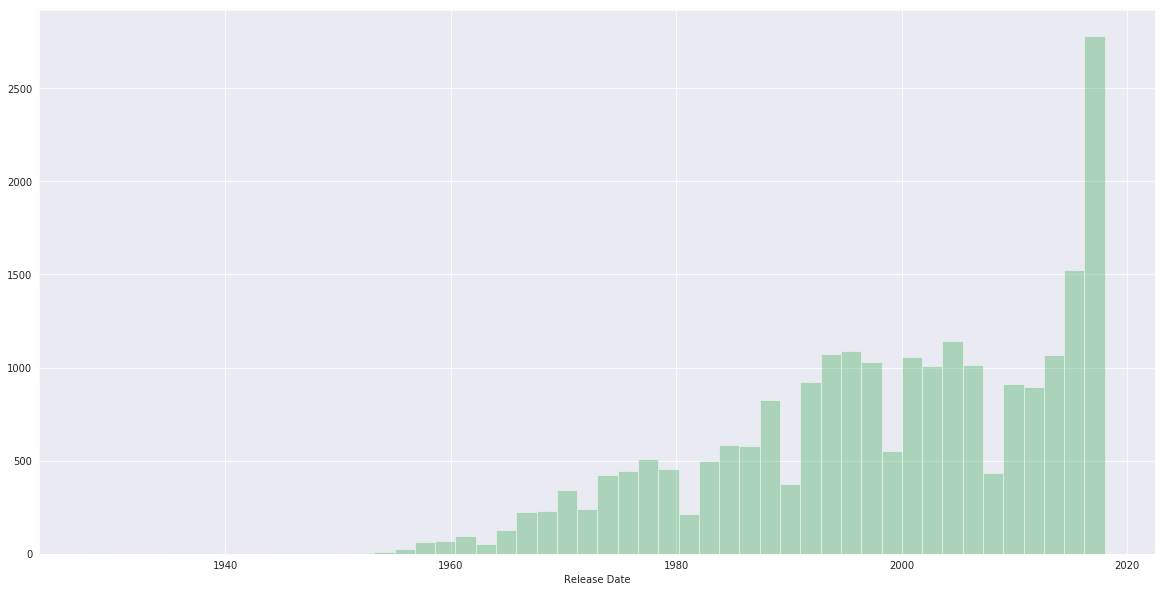

In [13]:
plt.figure(figsize=(20,10))
sns.set_style(style='darkgrid')
sns.distplot(songs['album_release_date'], kde=False, color='#4eb264', )
plt.xlabel('Release Date');

In [14]:
songs['album_release_date'].value_counts().head()

2018    1573
2017    1207
2015     780
2016     744
2005     621
Name: album_release_date, dtype: int64

It seems as though the vast majority of songs within this dataset have been released after 1990. This *could* be an issue to do with Spotify's information on release dates, however, it could also just be indicative of what people are listening to in 2018. Even though these artists received awards through different decades, they could've released new music which would be more popular currently. 

That being said, it would be interesting to see the distribution of when music in the RIAA Gold and Platinum database was actually released, to get a scope of the share of artists per decade.

#### Songs by Genre & Year

In [15]:
gs.columns

Index(['song_id', 'genre_id', 'genre_name', 'artist_id'], dtype='object')

##### Top 10 Genres

In [46]:
top10_genres = gs['genre_name'].value_counts().head(10)

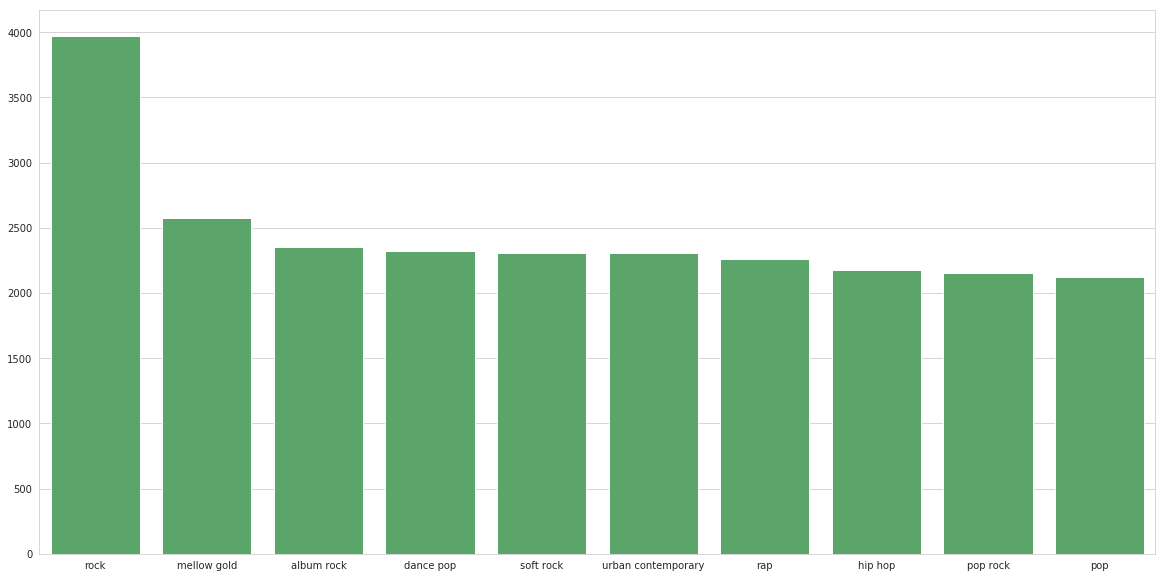

In [47]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.barplot(top10_genres.index, top10_genres.values, color='#4eb264');
# plt.

##### Bottom 10 Genres

In [48]:
bottom10_genres = gs['genre_name'].value_counts().tail(10)

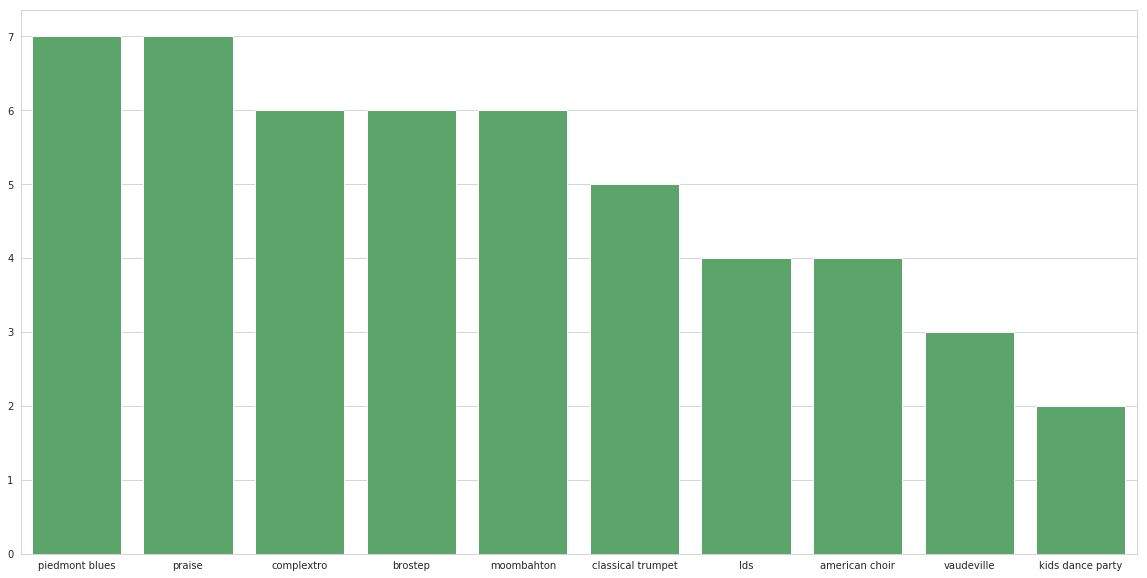

In [49]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.barplot(bottom10_genres.index, bottom10_genres.values, color='#4eb264');

I have no idea what a bunch of these mean. Might be good to grab descriptions.

##### Most Popular Genres & the Makeup of Release Dates

In [57]:
gs['song_id'][gs.isnull().any(1)].value_counts()

7b78MrR0Gon0UzNpPLVUtA    564
7hNEzP76pKoToPKofbxU11    564
2o3vwVUMv4PesWNPg79Rpa    564
2VpdG2QLhVv6qAPdDt9Ipr    564
2iXFgW0O1fNqfmzYJmBat4    564
6dj3ykSdhSZBDBuopn3TVo    564
7rE9wYXPgLqZsXVxn2JhU9    564
0rEr2Gvx9FPIuDz8RDUoZE    564
51LRCAUUf51O9gCwf2TdAW    564
0A2FMrx8LiswErLm7OSNDL    564
3u5e3ovyvQLoauwUzWezvX    564
3XIlw0G91i34Hr13m41YXi    564
6euU5usxJZoLTA6QwLoSQv    564
53k1EDs8X9BbWxxTYHZwZs    564
6o0rq9TA8yhkQJFQnoKaa6    564
1dVHcUOAbm9I4eZSGMxGqd    564
7uVbxPHxAkNY0ogBnaYkq9    564
778oDR7k9raMsVOl1ySKpf    564
15tHagkk8z306XkyOHqiip    564
1kF98aqjxGX5jfDKGH2c9x    564
2a1V9QpXiVGHkb6m0vabRU    564
25KYu8EzucmTHYiOgVYIr5    564
5CjBdIWWxkh8XYLv62kAug    564
6xvyHB0hRzt4ZUrp3RWz0h    564
2tCuNDJkPUBpOo1olUEyIN    564
33mf4dBD6UsOXvMb7UDRxX    564
4W3Q0iM0BTmc8pLJGCZ1Uq    564
55CGBzG5OSKlv5NRsJl1aA    564
0vAAeH3bKh30vtiK7pgNpa    564
6jwUHPPwXfdMPFd6hNx0Yl    564
                         ... 
6yVvMWZQjsuyzQYZ8lGqKW    564
0sF71wQEypjvyZR4e5WFz1    564
09Zeey6ioJ

In [61]:
songs.query('s_song_id == "7b78MrR0Gon0UzNpPLVUtA"')

,album_release_date,artist_id,artist_name,duration_ms,explicit,linked_album,song_title
s_song_id,,,,,,,
7b78MrR0Gon0UzNpPLVUtA,1974,7hbzXJ5K6AqdPnbUcCL1hL,The Souther-Hillman-Furay Band,337840.0,False,The Souther-Hillman-Furay Band,"Deep, Dark And Dreamless"


## Looking at Audio Features